In [1]:
%matplotlib inline

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
numpy.random.seed(666)

In [4]:
dataframe = pandas.read_csv('monthly-milk-production-pounds-p.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

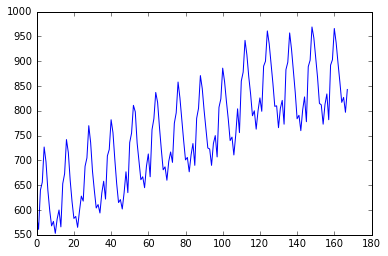

In [5]:
plt.plot(dataset)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

112 56


In [34]:
shift_length = 1

In [35]:
def convert_shifted(dataset, shift_length=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - shift_length - 1):
        a = dataset[i:(i + shift_length), 0]
        dataX.append(a)
        dataY.append(dataset[i + shift_length, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [36]:
trainX, trainY = convert_shifted(train, shift_length)
testX, testY = convert_shifted(test, shift_length)

In [37]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [38]:
model = Sequential()
model.add(LSTM(4, input_dim=shift_length))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=50, batch_size=1, verbose=2)

Epoch 1/100
2s - loss: 0.0748
Epoch 2/100
1s - loss: 0.0311
Epoch 3/100
0s - loss: 0.0224
Epoch 4/100
0s - loss: 0.0204
Epoch 5/100
0s - loss: 0.0192
Epoch 6/100
0s - loss: 0.0177
Epoch 7/100
0s - loss: 0.0165
Epoch 8/100
0s - loss: 0.0154
Epoch 9/100
1s - loss: 0.0144
Epoch 10/100
0s - loss: 0.0138
Epoch 11/100
0s - loss: 0.0130
Epoch 12/100
0s - loss: 0.0124
Epoch 13/100
0s - loss: 0.0120
Epoch 14/100
0s - loss: 0.0116
Epoch 15/100
0s - loss: 0.0117
Epoch 16/100
0s - loss: 0.0113
Epoch 17/100
0s - loss: 0.0111
Epoch 18/100
0s - loss: 0.0111
Epoch 19/100
0s - loss: 0.0111
Epoch 20/100
0s - loss: 0.0110
Epoch 21/100
0s - loss: 0.0111
Epoch 22/100
0s - loss: 0.0110
Epoch 23/100
0s - loss: 0.0110
Epoch 24/100
1s - loss: 0.0110
Epoch 25/100
1s - loss: 0.0109
Epoch 26/100
0s - loss: 0.0110
Epoch 27/100
0s - loss: 0.0109
Epoch 28/100
0s - loss: 0.0109
Epoch 29/100
0s - loss: 0.0110
Epoch 30/100
1s - loss: 0.0109
Epoch 31/100
0s - loss: 0.0110
Epoch 32/100
1s - loss: 0.0109
Epoch 33/100
0s -

In [39]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 43.05 RMSE
Test Score: 51.51 RMSE


In [40]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[shift_length:len(trainPredict) + shift_length, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (shift_length * 2) + 1 : len(dataset) - 1, :] = testPredict

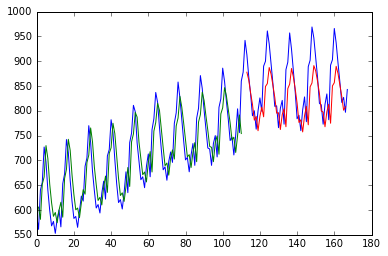

In [41]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)